In [1]:
import pandas as pd

In [3]:
# Cargar el archivo
data = pd.read_csv('Mall_Customers.csv')

In [7]:

# Verificar que se haya cargado correctamente
print(data.head())
!pip install pandas matplotlib seaborn scikit-learn

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [9]:
# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score


In [11]:
# Cargar el dataset
data = pd.read_csv('Mall_Customers.csv')

In [13]:
# Convertir 'Gender' a valores numéricos
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])


In [15]:
# Seleccionar las características para clustering
features = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']


In [17]:
# Escalar las características
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])


In [19]:
# Determinar el número óptimo de clusters usando el método del codo
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)


C:\Users\felix\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\felix\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\felix\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\felix\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

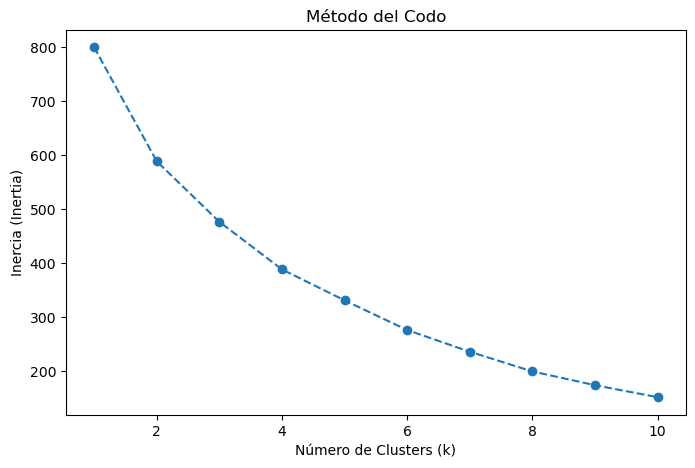

In [21]:
# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia (Inertia)')
plt.show()

In [23]:
# Entrenar el modelo con el número óptimo de clusters (elige k basado en el gráfico del codo)
k_opt = 4  # Cambia este valor según lo que observes en el gráfico del codo
kmeans_opt = KMeans(n_clusters=k_opt, random_state=42, n_init=10)
clusters = kmeans_opt.fit_predict(data_scaled)

C:\Users\felix\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [27]:
# Evaluar el modelo
silhouette_avg = silhouette_score(data_scaled, clusters)
calinski_harabasz = calinski_harabasz_score(data_scaled, clusters)

print(f"Coeficiente de Silhouette: {silhouette_avg}")
print(f"Índice de Calinski-Harabasz: {calinski_harabasz}")


Coeficiente de Silhouette: 0.2983972818544038
Índice de Calinski-Harabasz: 69.1257997708155


In [29]:
# Agregar los clusters al DataFrame original
data['Cluster'] = clusters

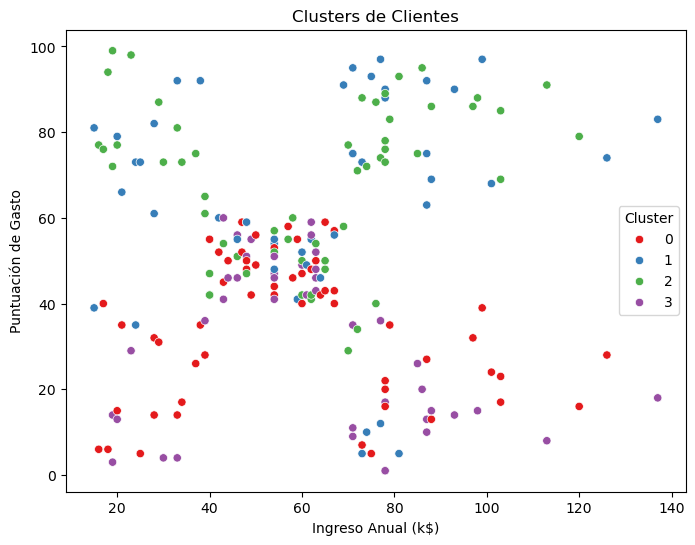

In [31]:
# Visualizar los clusters (ejemplo con dos características principales)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=data['Annual Income (k$)'], 
    y=data['Spending Score (1-100)'], 
    hue=data['Cluster'], 
    palette='Set1'
)
plt.title('Clusters de Clientes')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntuación de Gasto')
plt.legend(title='Cluster')
plt.show()
